### Ishaan Mehta E18CSE069 EB02 LabWeek6

In [55]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [56]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [57]:
y_test = tf.keras.utils.to_categorical(y_test)
y_train=tf.keras.utils.to_categorical(y_train)

In [58]:
print('Shape of train Data',(X_train.shape,y_train.shape))
print('Shape of test Data',(X_test.shape,y_test.shape))

Shape of train Data ((60000, 28, 28), (60000, 10))
Shape of test Data ((10000, 28, 28), (10000, 10))


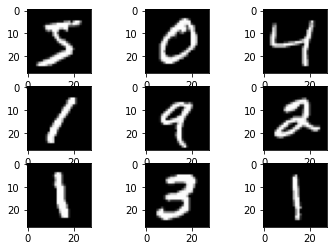

In [59]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [60]:
X_train.shape

(60000, 28, 28)

In [61]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [62]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0


 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 4  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3564 - accuracy: 0.8965
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1867 - accuracy: 0.9464
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1303 - accuracy: 0.9623
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1026 - accuracy: 0.9705
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9745


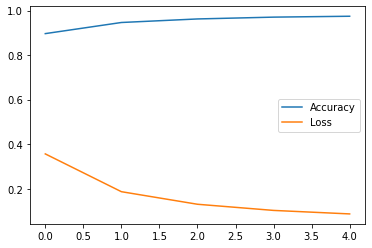

 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 32  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1635 - accuracy: 0.9525
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9799
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0494 - accuracy: 0.9849
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406 - accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315 - accuracy: 0.9901


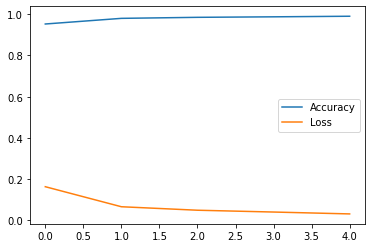

 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 128  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1419 - accuracy: 0.9567
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9834
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0342 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0168 - accuracy: 0.9948


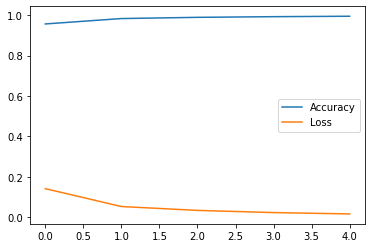

 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 512  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2783 - accuracy: 0.9501
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0528 - accuracy: 0.9841
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0318 - accuracy: 0.9897
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0201 - accuracy: 0.9933
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0143 - accuracy: 0.9950


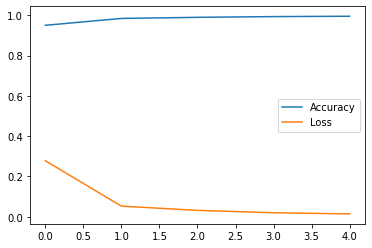

 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 2056  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.9054 - accuracy: 0.9455
Epoch 2/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0644 - accuracy: 0.9835
Epoch 3/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0356 - accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0271 - accuracy: 0.9911
Epoch 5/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0174 - accuracy: 0.9946


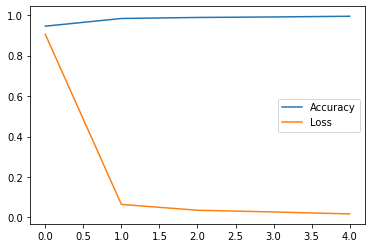

In [63]:
no_of_filters=[4,32,128,512,2056]
for filters in no_of_filters:
  print(" #### RUNNING MODEL WITH 1 HIDDEN LAYER AND",filters," FILTERS OF SIZE 3x3")
  model=Sequential()
  model.add(Conv2D(filters, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  hist=model.fit(X_train,y_train,epochs=5)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['loss'])
  plt.legend(['Accuracy','Loss'])
  plt.show()


 #### RUNNING MODEL WITH  1  HIDDEN LAYER AND  32  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1702 - accuracy: 0.9487
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9804
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0493 - accuracy: 0.9846
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0374 - accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0302 - accuracy: 0.9904


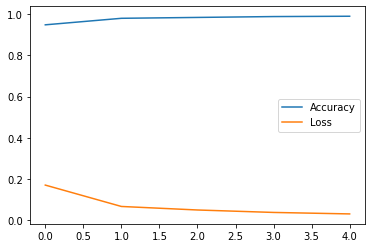

 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  32  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1165 - accuracy: 0.9643
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0454 - accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0305 - accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.9933
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0159 - accuracy: 0.9945


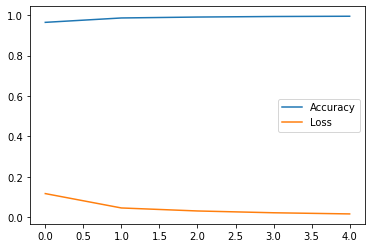

 #### RUNNING MODEL WITH  3  HIDDEN LAYER AND  32  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1134 - accuracy: 0.9658
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0427 - accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0301 - accuracy: 0.9902
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0157 - accuracy: 0.9947


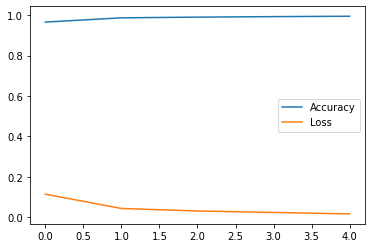

 #### RUNNING MODEL WITH  4  HIDDEN LAYER AND  32  FILTERS OF SIZE 3x3
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1128 - accuracy: 0.9653
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0439 - accuracy: 0.9866
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0320 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0180 - accuracy: 0.9944


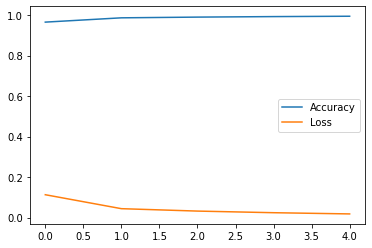

In [64]:
for no_of_layers in range(4):
  print(" #### RUNNING MODEL WITH ",no_of_layers+1," HIDDEN LAYER AND ",32," FILTERS OF SIZE 3x3")
  model=Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  for i in range(no_of_layers):
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  hist=model.fit(X_train,y_train,epochs=5)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['loss'])
  plt.legend(['Accuracy','Loss'])
  plt.show()


 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  16  FILTERS OF SIZE:  3  x  3
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1560 - accuracy: 0.9520
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0584 - accuracy: 0.9819
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9870
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0332 - accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0257 - accuracy: 0.9919


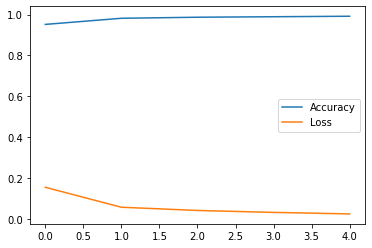

 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  16  FILTERS OF SIZE:  5  x  5
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1372 - accuracy: 0.9581
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9839
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0376 - accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9910
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - accuracy: 0.9927


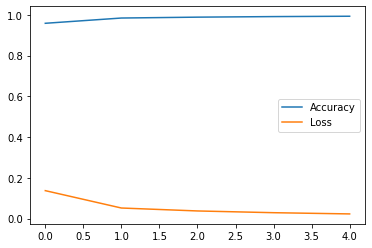

 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  16  FILTERS OF SIZE:  7  x  7
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1431 - accuracy: 0.9567
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0514 - accuracy: 0.9842
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0372 - accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0298 - accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0233 - accuracy: 0.9923


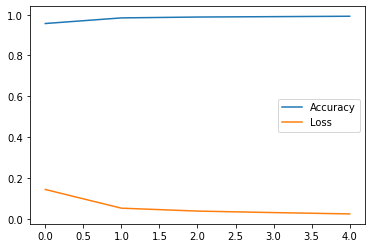

In [65]:
filter_sizes=[3,5,7]
for filter_size in filter_sizes:
  print(" #### RUNNING MODEL WITH ",2," HIDDEN LAYER AND ",16," FILTERS OF SIZE: ",filter_size ," x ", filter_size)
  model=Sequential()
  model.add(Conv2D(16, (filter_size, filter_size), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Conv2D(16, (filter_size, filter_size), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  hist=model.fit(X_train,y_train,epochs=5)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['loss'])
  plt.legend(['Accuracy','Loss'])
  plt.show()


 #### RUNNING MODEL WITH sigmoid as activation function
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3661 - accuracy: 0.8854
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1169 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0812 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9814


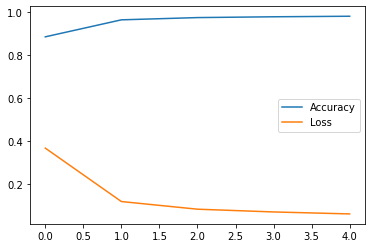

 #### RUNNING MODEL WITH relu as activation function
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7733 - accuracy: 0.5103
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0190 - accuracy: 0.5707
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.9974 - accuracy: 0.5805
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.8524 - accuracy: 0.5887
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6273 - accuracy: 0.5886


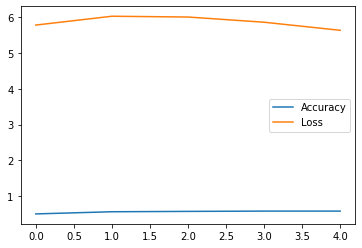

 #### RUNNING MODEL WITH tanh as activation function
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3964 - accuracy: 0.1006
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987


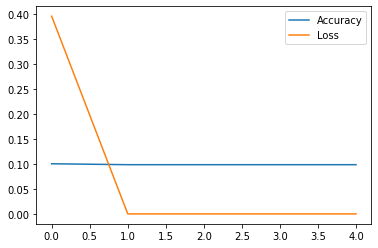

In [66]:
activation_functions=['sigmoid','relu','tanh']
for activation_function in activation_functions:
  print(" #### RUNNING MODEL WITH",activation_function,"as activation function")
  model=Sequential()
  model.add(Conv2D(16, (filter_size, filter_size), activation=activation_function, kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Conv2D(16, (filter_size, filter_size), activation=activation_function, kernel_initializer='he_uniform'))
  model.add(Flatten())
  model.add(Dense(10, activation=activation_function))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  hist=model.fit(X_train,y_train,epochs=5)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['loss'])
  plt.legend(['Accuracy','Loss'])
  plt.show()


[(3, 5), (3, 7), (5, 7)]
 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  16  FILTERS OF SIZE:  3  and  5
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1722 - accuracy: 0.1013
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987


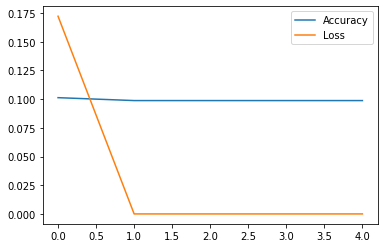

 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  16  FILTERS OF SIZE:  3  and  7
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6990 - accuracy: 0.1069
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987


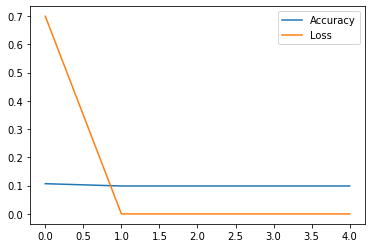

 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  16  FILTERS OF SIZE:  5  and  7
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1879 - accuracy: 0.0997
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1921e-07 - accuracy: 0.0987


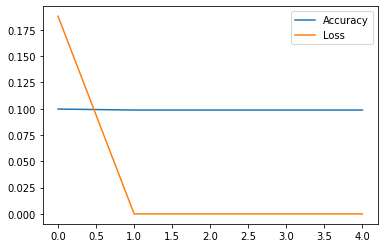

In [67]:
from itertools import combinations 
  
# Get all combinations of length 2 
# and length 2 
combination = list(combinations([3, 5, 7], 2) )
print(combination)    
for fsize in combination:

  print(" #### RUNNING MODEL WITH ",2," HIDDEN LAYER AND ",16," FILTERS OF SIZE: ",fsize[0] ," and ", fsize[1])
  model=Sequential()
  model.add(Conv2D(16, (fsize[0], fsize[0]), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Conv2D(16, (fsize[1], fsize[1]), activation='relu', kernel_initializer='he_uniform'))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  hist=model.fit(X_train,y_train,epochs=5)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['loss'])
  plt.legend(['Accuracy','Loss'])
  plt.show()


 #### RUNNING MODEL WITH  3  HIDDEN LAYER AND  16 32 16  FILTERS OF SIZE:  5 3  and  7
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1128 - accuracy: 0.9647
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0433 - accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0299 - accuracy: 0.9907
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0171 - accuracy: 0.9946


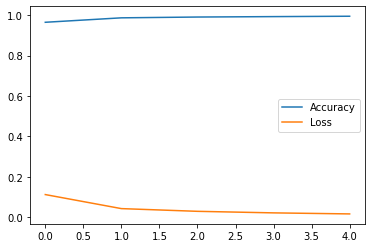

In [70]:
  print(" #### RUNNING MODEL WITH ",3," HIDDEN LAYER AND ",16,32,16," FILTERS OF SIZE: ",5,3 ," and ",7)
  model=Sequential()
  model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Conv2D(16, (7, 7), activation='relu', kernel_initializer='he_uniform'))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  hist=model.fit(X_train,y_train,epochs=5)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['loss'])
  plt.legend(['Accuracy','Loss'])
  plt.show()


 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  32  FILTERS OF SIZE:  3
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1113 - accuracy: 0.9668
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0250 - accuracy: 0.9918
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0109 - accuracy: 0.9963


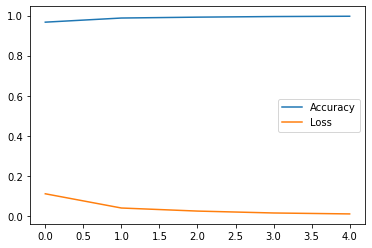

In [72]:
print(" #### RUNNING MODEL WITH ",2," HIDDEN LAYER AND ",32," FILTERS OF SIZE: ",3 )
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=5)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.show()


 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  32  FILTERS OF SIZE:  3
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1987 - accuracy: 0.9413
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0711 - accuracy: 0.9782
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0499 - accuracy: 0.9845
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - accuracy: 0.9882
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0312 - accuracy: 0.9900


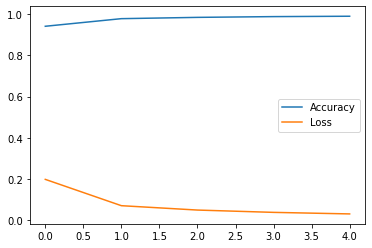

In [73]:
print(" #### RUNNING MODEL WITH ",2," HIDDEN LAYER AND ",32," FILTERS OF SIZE: ",,"without strides" )
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),strides=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',strides=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=5)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.show()


 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  32  FILTERS OF SIZE:  3
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3017 - accuracy: 0.9120
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1271 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0954 - accuracy: 0.9711
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0794 - accuracy: 0.9757
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0691 - accuracy: 0.9791


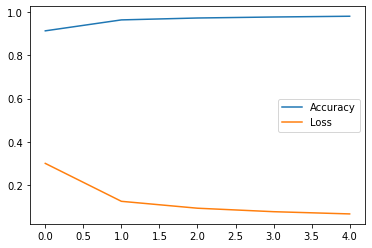

In [74]:
print(" #### RUNNING MODEL WITH ",2," HIDDEN LAYER AND ",32," FILTERS OF SIZE: ",3 ,"with Strides")
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),strides=(3,3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',strides=(3,3)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=5)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.show()


 #### RUNNING MODEL WITH  2  HIDDEN LAYER AND  32  FILTERS OF SIZE:  3 and Paddiing of 3,3
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1181 - accuracy: 0.9639
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0419 - accuracy: 0.9872
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0280 - accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0166 - accuracy: 0.9949
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0105 - accuracy: 0.9965


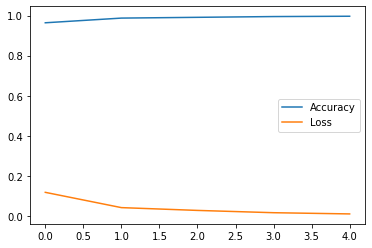

In [75]:
print(" #### RUNNING MODEL WITH ",2," HIDDEN LAYER AND ",32," FILTERS OF SIZE: ",3, "and Paddiing of 3,3"  )
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=5)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.show()


 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 2056  FILTERS OF SIZE 3x3 with pooling of 2 x 2
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1186 - accuracy: 0.9637
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0473 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0172 - accuracy: 0.9948


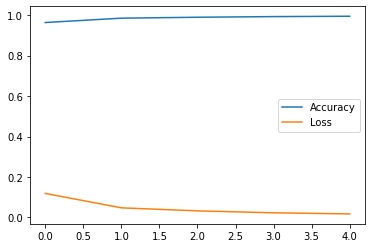

In [79]:
print(" #### RUNNING MODEL WITH 1 HIDDEN LAYER AND",filters," FILTERS OF SIZE 3x3 with pooling of 2 x 2")
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=5)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.show()

 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 2056  FILTERS OF SIZE 3x3 with pooling of 3 x 3
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1304 - accuracy: 0.9602
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0481 - accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0274 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0210 - accuracy: 0.9934


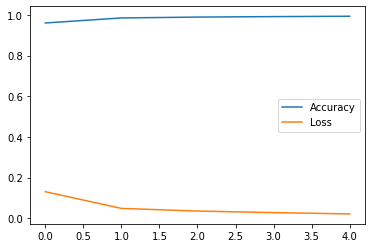

In [80]:
print(" #### RUNNING MODEL WITH 1 HIDDEN LAYER AND",filters," FILTERS OF SIZE 3x3 with pooling of 3 x 3")
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=5)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.show()

 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 2056  FILTERS OF SIZE 3x3 with pooling of 5 x 5
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1796 - accuracy: 0.9465
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.9802
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0494 - accuracy: 0.9848
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0411 - accuracy: 0.9871
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9888


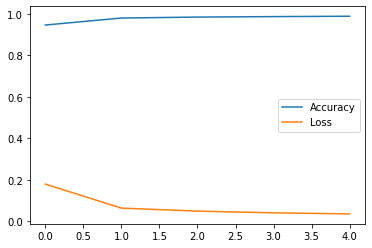

In [81]:
print(" #### RUNNING MODEL WITH 1 HIDDEN LAYER AND",filters," FILTERS OF SIZE 3x3 with pooling of 5 x 5")
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((5, 5)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=5)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.show()

 #### RUNNING MODEL WITH 1 HIDDEN LAYER AND 2056  FILTERS OF SIZE 3x3 with pooling of 7 x 7
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2275 - accuracy: 0.9312
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0730 - accuracy: 0.9767
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0563 - accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0477 - accuracy: 0.9847
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0411 - accuracy: 0.9864


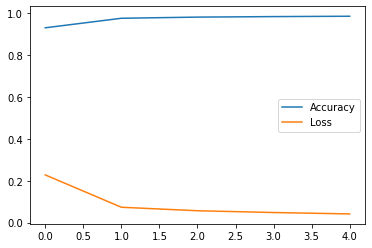

In [82]:
print(" #### RUNNING MODEL WITH 1 HIDDEN LAYER AND",filters," FILTERS OF SIZE 3x3 with pooling of 7 x 7")
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((7, 7)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=5)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.legend(['Accuracy','Loss'])
plt.show()